In [1]:
import torch
from time import time
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
from zipfile import ZipFile
import numpy as np
from time import time
from torchvision import datasets
from torchvision import transforms
import pandas as pd
import numpy as np
import zipfile
import re
import os
from PIL import Image
from torchvision.io import read_image
from matplotlib import image
from prepare_dataset import MyDataset,subset_generator
from utils import display_some_images,stats_of_image_and_label,MyCuda_Stats,get_output_features_of_model
from vgg_pretrained import vgg_all_freezed,total_trainable_parameters,full_vgg,vgg_layer_freeze
from Model import Network
from train_fn import train,validation,image_validation



In [2]:
fullvgg=full_vgg()
total_trainable_parameters(fullvgg)
total_trainable_parameters(fullvgg.features)
total_trainable_parameters(vgg_all_freezed())
total_trainable_parameters(vgg_layer_freeze(24))


Total trainable parameters of VGG is 	 138357544

Total trainable parameters of Sequential is 	 14714688

Total trainable parameters of Sequential is 	 0

Total trainable parameters of Sequential is 	 7079424


In [3]:
# DATA LOADER PARAMETERS
batch=16
CUDA_LAUNCH_BLOCKING=1 

In [4]:
MyCuda_Stats()

No of GPUs i have is 1
0
My Graphic Card is NVIDIA GeForce GTX 1050 Ti
Is Cuda Available True


In [1]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.ToTensor(),normalize])
target_transform=transforms.Compose([transforms.ToTensor()])

NameError: name 'transforms' is not defined

In [6]:
anno_dir=r"F:\Affectnet\annotations"
image_dir=r"F:\Affectnet\train_set\train_set\images"
train_data=MyDataset(anno_dir,image_dir,transform=transform, target_transform=None)

In [7]:
val_anno_dir=r"F:\Affectnet\val_set\val_set\annotations"
val_image_dir=r"F:\Affectnet\val_set\val_set\images"
val_data=MyDataset(val_anno_dir,val_image_dir,transform=transform, target_transform=None)

In [8]:
Subset_train_sampler=subset_generator(train_data,50000)

In [9]:
train_loader=torch.utils.data.DataLoader(train_data,
                                         batch_size=batch,
                                         shuffle=False,
                                         num_workers=4,
                                         pin_memory=True,
                                         sampler=Subset_train_sampler)
val_loader=torch.utils.data.DataLoader(val_data,
                                       batch_size=batch,
                                       shuffle=False,
                                       num_workers=4,
                                       pin_memory=True,
                                      sampler=None)

In [10]:
print(len(train_loader))
print(len(val_loader))

3125
250


In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [12]:
feature_extractor=vgg_layer_freeze(24)
total_trainable_parameters(feature_extractor)


Total trainable parameters of Sequential is 	 7079424


In [13]:

#input_features_for_denselayer=get_output_features_of_model(model=feature_extractor,batch_size=32,dataloader=train_loader)
input_features_for_denselayer=25088


In [14]:
model1=Network(feature_extractor,input_features_for_denselayer).to(device)
model1

Network(
  (extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [15]:
total_trainable_parameters(model1)


Total trainable parameters of Network is 	 114171528


In [16]:
lr=0.001
loss1=nn.CrossEntropyLoss()
optimizer=optim.SGD(model1.parameters(),lr,momentum=0.9)

In [17]:
torch.backends.cudnn.benchmark = True

In [18]:
len(train_loader)

3125

In [19]:
epochs=50
for epoch in range(epochs):
    print(f'Epoch-{epoch}')
    train(train_loader,model1,loss1,optimizer)
    validation(val_loader,model1,loss1)

  


Epoch-0


100%|████████████████████████████████████████████████████████████████████████████| 3125/3125 [1:55:50<00:00,  2.22s/it]


loss:0.858597 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [02:14<00:00,  1.85it/s]


test error-2.285407 
 Accuracy-29.782446%
Epoch-1


100%|████████████████████████████████████████████████████████████████████████████| 3125/3125 [1:06:45<00:00,  1.28s/it]


loss:0.602496 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [01:47<00:00,  2.32it/s]


test error-2.028219 
 Accuracy-34.933733%
Epoch-2


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [42:57<00:00,  1.21it/s]


loss:1.085388 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:58<00:00,  4.30it/s]


test error-1.884647 
 Accuracy-39.359840%
Epoch-3


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [31:05<00:00,  1.68it/s]


loss:0.884371 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [03:08<00:00,  1.33it/s]


test error-1.925254 
 Accuracy-38.634659%
Epoch-4


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [35:22<00:00,  1.47it/s]


loss:0.811767 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:49<00:00,  5.02it/s]


test error-1.999663 
 Accuracy-40.235059%
Epoch-5


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [36:20<00:00,  1.43it/s]


loss:0.316340 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [04:50<00:00,  1.16s/it]


test error-2.156307 
 Accuracy-40.760190%
Epoch-6


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [35:01<00:00,  1.49it/s]


loss:0.797178 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:49<00:00,  5.01it/s]


test error-2.416503 
 Accuracy-40.685171%
Epoch-7


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [35:32<00:00,  1.47it/s]


loss:0.266298 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [01:30<00:00,  2.75it/s]


test error-2.686797 
 Accuracy-40.535134%
Epoch-8


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [54:49<00:00,  1.05s/it]


loss:0.452283 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [01:05<00:00,  3.84it/s]


test error-3.371700 
 Accuracy-38.534634%
Epoch-9


100%|████████████████████████████████████████████████████████████████████████████| 3125/3125 [1:19:51<00:00,  1.53s/it]


loss:0.225549 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [01:48<00:00,  2.31it/s]


test error-3.118059 
 Accuracy-41.735434%
Epoch-10


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [37:27<00:00,  1.39it/s]


loss:0.390429 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:58<00:00,  4.27it/s]


test error-3.707613 
 Accuracy-39.409852%
Epoch-11


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [38:30<00:00,  1.35it/s]


loss:0.060262 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [01:15<00:00,  3.32it/s]


test error-4.546953 
 Accuracy-38.434609%
Epoch-12


100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [37:21<00:00,  1.39it/s]


loss:0.271596 batch:3124/3125


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:52<00:00,  4.75it/s]


test error-4.589830 
 Accuracy-39.709927%
Epoch-13


 50%|███████████████████████████████████████▎                                      | 1576/3125 [16:05<15:49,  1.63it/s]


KeyboardInterrupt: 

In [ ]:
validation(val_loader,model1,loss1)

  0%|                                                                                          | 0/250 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


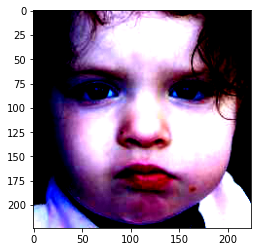

real value is  Neutral


C:\Users\DELL\Desktop\Python\Affect_Net\Affectnet\train_fn.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred_x,pred_y=pred_x.to(device),(torch.tensor(pred_y)).to(device)


NameError: name 'model1' is not defined

In [21]:
torch.save(model1.state_dict(), r"C:\Users\DELL\Desktop\Python\Affect_Net\Affectnet\models\model1.pth")